<a href="https://colab.research.google.com/github/V-Krishna-Chaitanya/LinearRegression/blob/main/ml_linear_regression_1_19_21_april_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
### googleDriveLink [Just click to download]
#### https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

### load directly from web
direct_load_link = "https://gist.github.com/singhsidhukuldeep/065a77ae307134cb48b3ad9b664c636e/raw/ee3a84e683a60b305b2da28355e71faa44aaaf51/cars24-car-price-clean.csv"

In [ ]:
df = pd.read_csv(direct_load_link)
print(df.shape)
df.head()

(19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
X = df['max_power'].values
Y = df['selling_price'].values

In [ ]:
# hypothesis function/ model
def hypothesis(x,weights):
    """
    x: real input value of the one feature(max_power)
    weights: learned weights of the linear regression model [w0, w1]
    """
    # f(x) = wo+ w1*x1 ===>y_hat
    y_hat = weights[0]+ weights[1]*x
    return y_hat

In [ ]:
### MSE >> summation from 1 to n>> 1/n [(y_i-y_hat_i)^2]
def error (X, Y, weights):
    """
    X: list of feature x
    y: actual value (selling_price)
    weights: learned weights of the linear regression model [w0, w1]
    """
    n = len(X)
    err = 0

    for i in range(n):
        x_i = X[i]
        y_i = Y[i]
        y_hat_i = hypothesis(x_i,weights)
        error_i = (y_i-y_hat_i)**2
        err = err+error_i
    return err/n

In [ ]:
def gradient(X,Y, weights):
    """
    X: list of feature x
    y: actual value (selling_price)
    weights: learned weights of the linear regression model [w0, w1]
    """
    n = len(X)
    grad = np.zeros((2,))# [0,0] >> [w0, w1]
    for i in range(n):
        x_i = X[i]
        y_i = Y[i]
        y_hat_i = hypothesis(x_i,weights)
        grad[0] += -2*(y_i -y_hat_i)
        grad[1] += -2*(y_i -y_hat_i)*x_i
    return grad/n

In [ ]:
def gradient_descent(X,Y, max_iter = 100, learning_rate = 0.1):
    # step 1: starting weights
    weights = np.random.rand(2) #>> [0.12, 0.5792]
    # step 2: repeat gradient descent 100 times (max_iter)
    error_list = []
    for i in range(max_iter):
        error_list.append(error (X, Y, weights)) # recording error

        gradient_val = gradient(X,Y, weights)
        weights[0] = weights[0]-learning_rate*gradient_val[0]## w0
        weights[1] = weights[1]-learning_rate*gradient_val[1]## w1
    return weights, error_list

In [ ]:
opt_weights, error_list = gradient_descent(X,Y)

In [ ]:
opt_weights

array([1.16836392e-10, 7.70389854e-01])

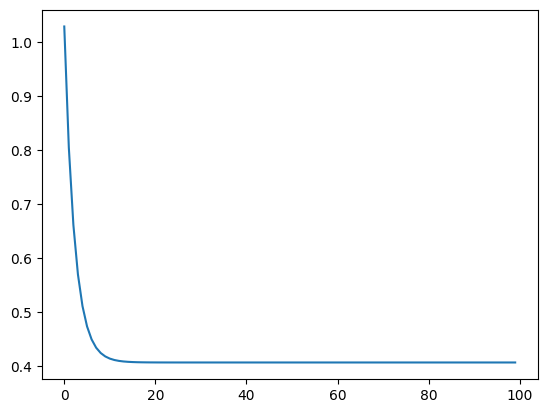

In [ ]:
plt.plot(error_list)

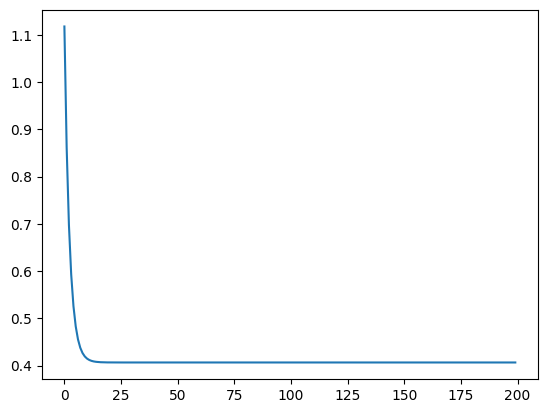

In [ ]:
opt_weights, error_list = gradient_descent(X,Y, max_iter = 200)
plt.plot(error_list)

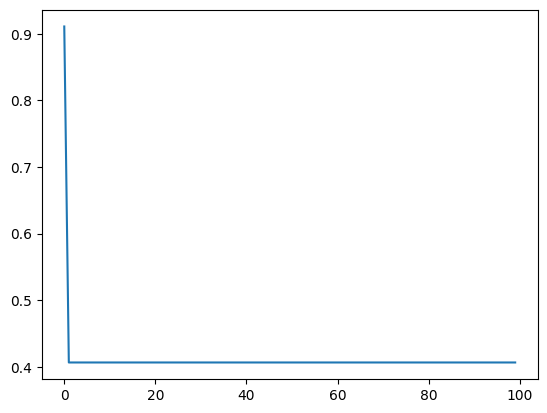

In [ ]:
opt_weights, error_list = gradient_descent(X,Y, max_iter = 100, learning_rate = 0.5)
plt.plot(error_list)

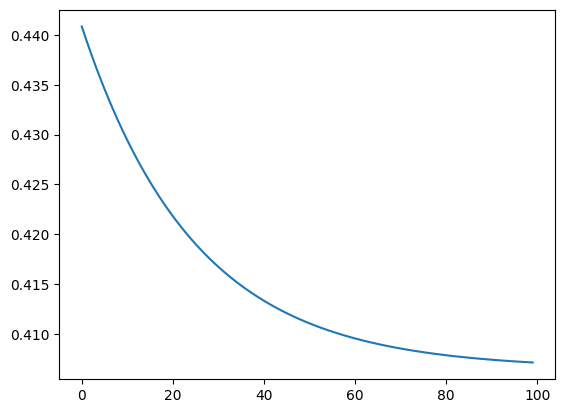

In [ ]:
opt_weights, error_list = gradient_descent(X,Y, max_iter = 100, learning_rate = 0.01)
plt.plot(error_list)

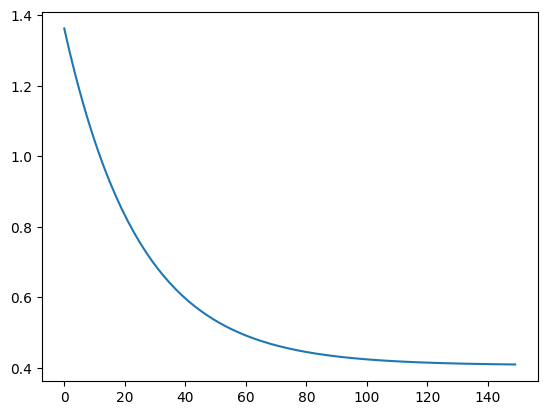

In [ ]:
opt_weights, error_list = gradient_descent(X,Y, max_iter = 150, learning_rate = 0.01)
plt.plot(error_list)

In [ ]:
hypothesis(x=0.8,weights=opt_weights)

0.6493846356583445

In [ ]:
y_pred = []
for x in X:
    y_pred.append(hypothesis(x,weights=opt_weights))
y_pred = np.array(y_pred)

In [ ]:
y_pred[180], Y[180]

(-0.7198282717191314, -0.8428521544192256)

In [ ]:
def r2score(Y, y_pred):
    # 1- num/denom
    num = np.sum((Y-y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    return 1- (num/denom)

In [ ]:
r2score(Y, y_pred)

0.5935005280317714

In [ ]:
#### LR

In [ ]:
df = pd.read_csv(direct_load_link)
print(df.shape)
df.head()

(19820, 18)


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
df.columns

Index(['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [ ]:
Y = df['selling_price'].values
print('shape of Y', Y.shape)
X = df[[ 'year', 'km_driven', 'mileage', 'engine', 'max_power',
       'age', 'make', 'model', 'Individual', 'Trustmark Dealer', 'Diesel',
       'Electric', 'LPG', 'Petrol', 'Manual', '5', '>5']].values
print('shape of X', X.shape)

shape of Y (19820,)
shape of X (19820, 17)


In [ ]:
ones = np.ones((len(X),1))
print(ones.shape)

(19820, 1)


In [ ]:
X = np.hstack([ones, X])
print('shape of X', X.shape)

shape of X (19820, 18)


In [ ]:
X[180]

array([ 1.        ,  0.13719357, -0.06107699,  1.38135096, -1.04077506,
       -0.93436884, -0.13719357, -0.93556599, -0.98083648, -0.80070971,
       -0.09838223,  1.01494517, -0.02009467, -0.0569168 , -0.97596977,
        0.4958182 ,  0.44450319, -0.42472845])

In [ ]:
# hypothesis function/ model
def hypothesis(X,W):
    return np.dot(X, W)

In [ ]:
def error (X, Y, W):
    Y_hat = hypothesis(X,W)
    return np.mean((Y-Y_hat)**2)

In [ ]:
def gradient(X,Y, W):
    Y_hat = hypothesis(X,W)
    return np.dot(X.T, Y_hat-Y)*(2/len(X))

In [ ]:
def gradient_descent(X,Y, max_iter = 100, learning_rate = 0.1):
    # step 1: starting weights
    num_features = X.shape[1]
    W = np.random.rand(num_features)
    # step 2: repeat gradient descent 100 times (max_iter)
    error_list = []
    for i in range(max_iter):
        error_list.append(error (X, Y, W)) # recording error

        GRAD = gradient(X,Y, W)
        W = W - (GRAD*learning_rate)
    return W, error_list

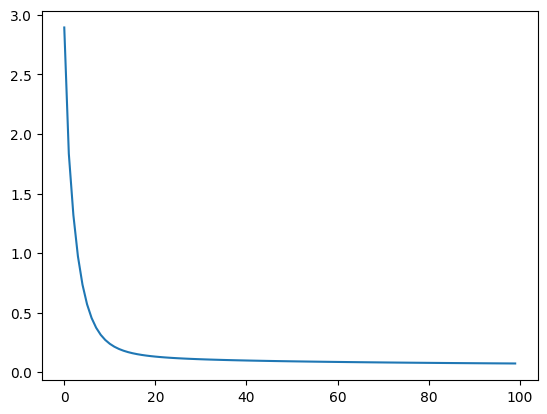

In [ ]:
opt_weights, error_list = gradient_descent(X,Y, max_iter = 100, learning_rate = 0.1)
plt.plot(error_list)

In [ ]:
def r2score(Y, y_pred):
    # 1- num/denom
    num = np.sum((Y-y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    return 1- (num/denom)

In [ ]:
r2score(Y, hypothesis(X,W=opt_weights))

0.9264719729355559

In [ ]:
(0.92-0.59)/0.59

0.5593220338983053

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [ ]:
r2score(Y, y_pred=model.predict(X))

0.9421884103225183

In [ ]:
model.score(X,Y)

0.9421884103225183

In [ ]:
model.coef_, model.intercept_

(array([ 0.00000000e+00, -1.67427285e+11, -1.81905208e-02, -4.86738401e-02,
         3.14359899e-02,  2.73561233e-02, -1.67427285e+11,  6.07458002e-02,
         7.94168235e-01, -1.69560606e-02, -3.42592687e-03,  1.39949901e-02,
         1.27394101e-02,  2.85482041e-03, -2.26403249e-02, -1.29255175e-02,
        -2.46130372e-02, -3.26423645e-02]),
 -0.00022556388345827515)

In [ ]:
def adjr2score(Y, y_pred, X):
    # 1- num/denom
    num = np.sum((Y-y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    r2score =  1- (num/denom)
    n,d = X.shape
    return 1- ((1-r2score)*(n-1)/(n-d-1))

In [ ]:
adjr2score(Y, y_pred=model.predict(X), X=X)

0.941989372901726

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# 17 features>> 17 differnt uni-variate models